## **Owner**: Ahmed Tarek Mohamed

# **Data Frame One (Obesity)**

# **1. Importing Libraries & Tools**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch
from sklearn.mixture import GaussianMixture

**Setting up the environment by importing essential libraries and tool**

1. pandas: Used for data manipulation and analysis.
2. matplotlib.pyplot: A library for creating static, animated, and interactive visualizations in Python.
3. StandardScaler: From scikit-learn, used for standardizing features by removing the mean and scaling to unit variance.
4. LabelEncoder: From scikit-learn, used for converting categorical labels into numerical format.
5. PCA: Principal Component Analysis, a dimensionality reduction technique from scikit-learn.
6. KMeans, AgglomerativeClustering, DBSCAN, Birch: Different clustering algorithms from scikit-learn.
7. GaussianMixture: Gaussian Mixture Model (GMM) for clustering from scikit-learn.

# **2. Importing Dataset**

In [ ]:
# Load the dataset
data = pd.read_csv('/Datasets/ObesityDataSet.csv')
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# **3. Preprocessing Data**



In [ ]:
# Selecting specific columns for clustering
selected_columns = ['Age', 'Height', 'Weight', 'FCVC', 'FAF']
data_selected = data[selected_columns].copy()
#FCVC = Frequency of consumption of vegetables
#FAF = Physical activity frequency

# Handle missing values within the selected columns
data_selected.dropna(inplace=True)

# Scaling the selected data
scaler = StandardScaler()
scaled_data_selected = scaler.fit_transform(data_selected)

In [ ]:
# Display the selected data
print("Selected Data:")
print(data_selected.head())

Selected Data:
    Age  Height  Weight  FCVC  FAF
0  21.0    1.62    64.0   2.0  0.0
1  21.0    1.52    56.0   3.0  3.0
2  23.0    1.80    77.0   2.0  2.0
3  27.0    1.80    87.0   3.0  2.0
4  22.0    1.78    89.8   2.0  0.0


**Selecting specific columns for clustering:**
* Columns chosen: 'Age', 'Height', 'Weight', 'FCVC', 'FAF'
* Create a new DataFrame (data_selected) containing only these columns.

**Handling missing values within the selected columns:**
* Remove rows with missing values (NaN) from data_selected.

**Scaling the selected data:**
* Use a StandardScaler from scikit-learn to standardize the features.
* Apply fit_transform to scale and transform the selected data.

**Displaying the selected data:**
* Print the first few rows of the preprocessed data (data_selected) for inspection.

# **4. Clustering Models**

In [ ]:
# Clustering Models
models = {
    'KMeans': KMeans(n_clusters=5, random_state=0),
    'Hierarchical': AgglomerativeClustering(n_clusters=5),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'AgglomerativeClustering': AgglomerativeClustering(),
    'Birch': Birch(),
    'GMM': GaussianMixture(n_components=5, random_state=0)
}

# Applying models and storing labels
labels = {}
for name, model in models.items():
    if name == 'GMM':
        labels[name] = model.fit(scaled_data_selected).predict(scaled_data_selected)
    else:
        labels[name] = model.fit_predict(scaled_data_selected)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Clustering Models:**
* Various clustering models are defined in the models dictionary:
 * KMeans: K-Means clustering with 5 clusters.

 *  Hierarchical: Agglomerative clustering with 5 clusters.
 * DBSCAN: Density-Based Spatial Clustering of Applications with Noise.
 * AgglomerativeClustering: Agglomerative clustering with default parameters.
 * Birch: Birch clustering with default parameters.
 * GMM (Gaussian Mixture Model): Gaussian Mixture Model with 5 components.

* Applying models and storing labels:

 * A dictionary (labels) is created to store the cluster labels for each model.
 * A loop iterates through each model in the models dictionary.
   *  If the model is 'GMM' (Gaussian Mixture Model), it uses fit and predict on the scaled data.
   * For other models, it uses fit_predict on the scaled data.
* The resulting cluster labels are stored in the labels dictionary for each model.

# **5. Visualize Data**

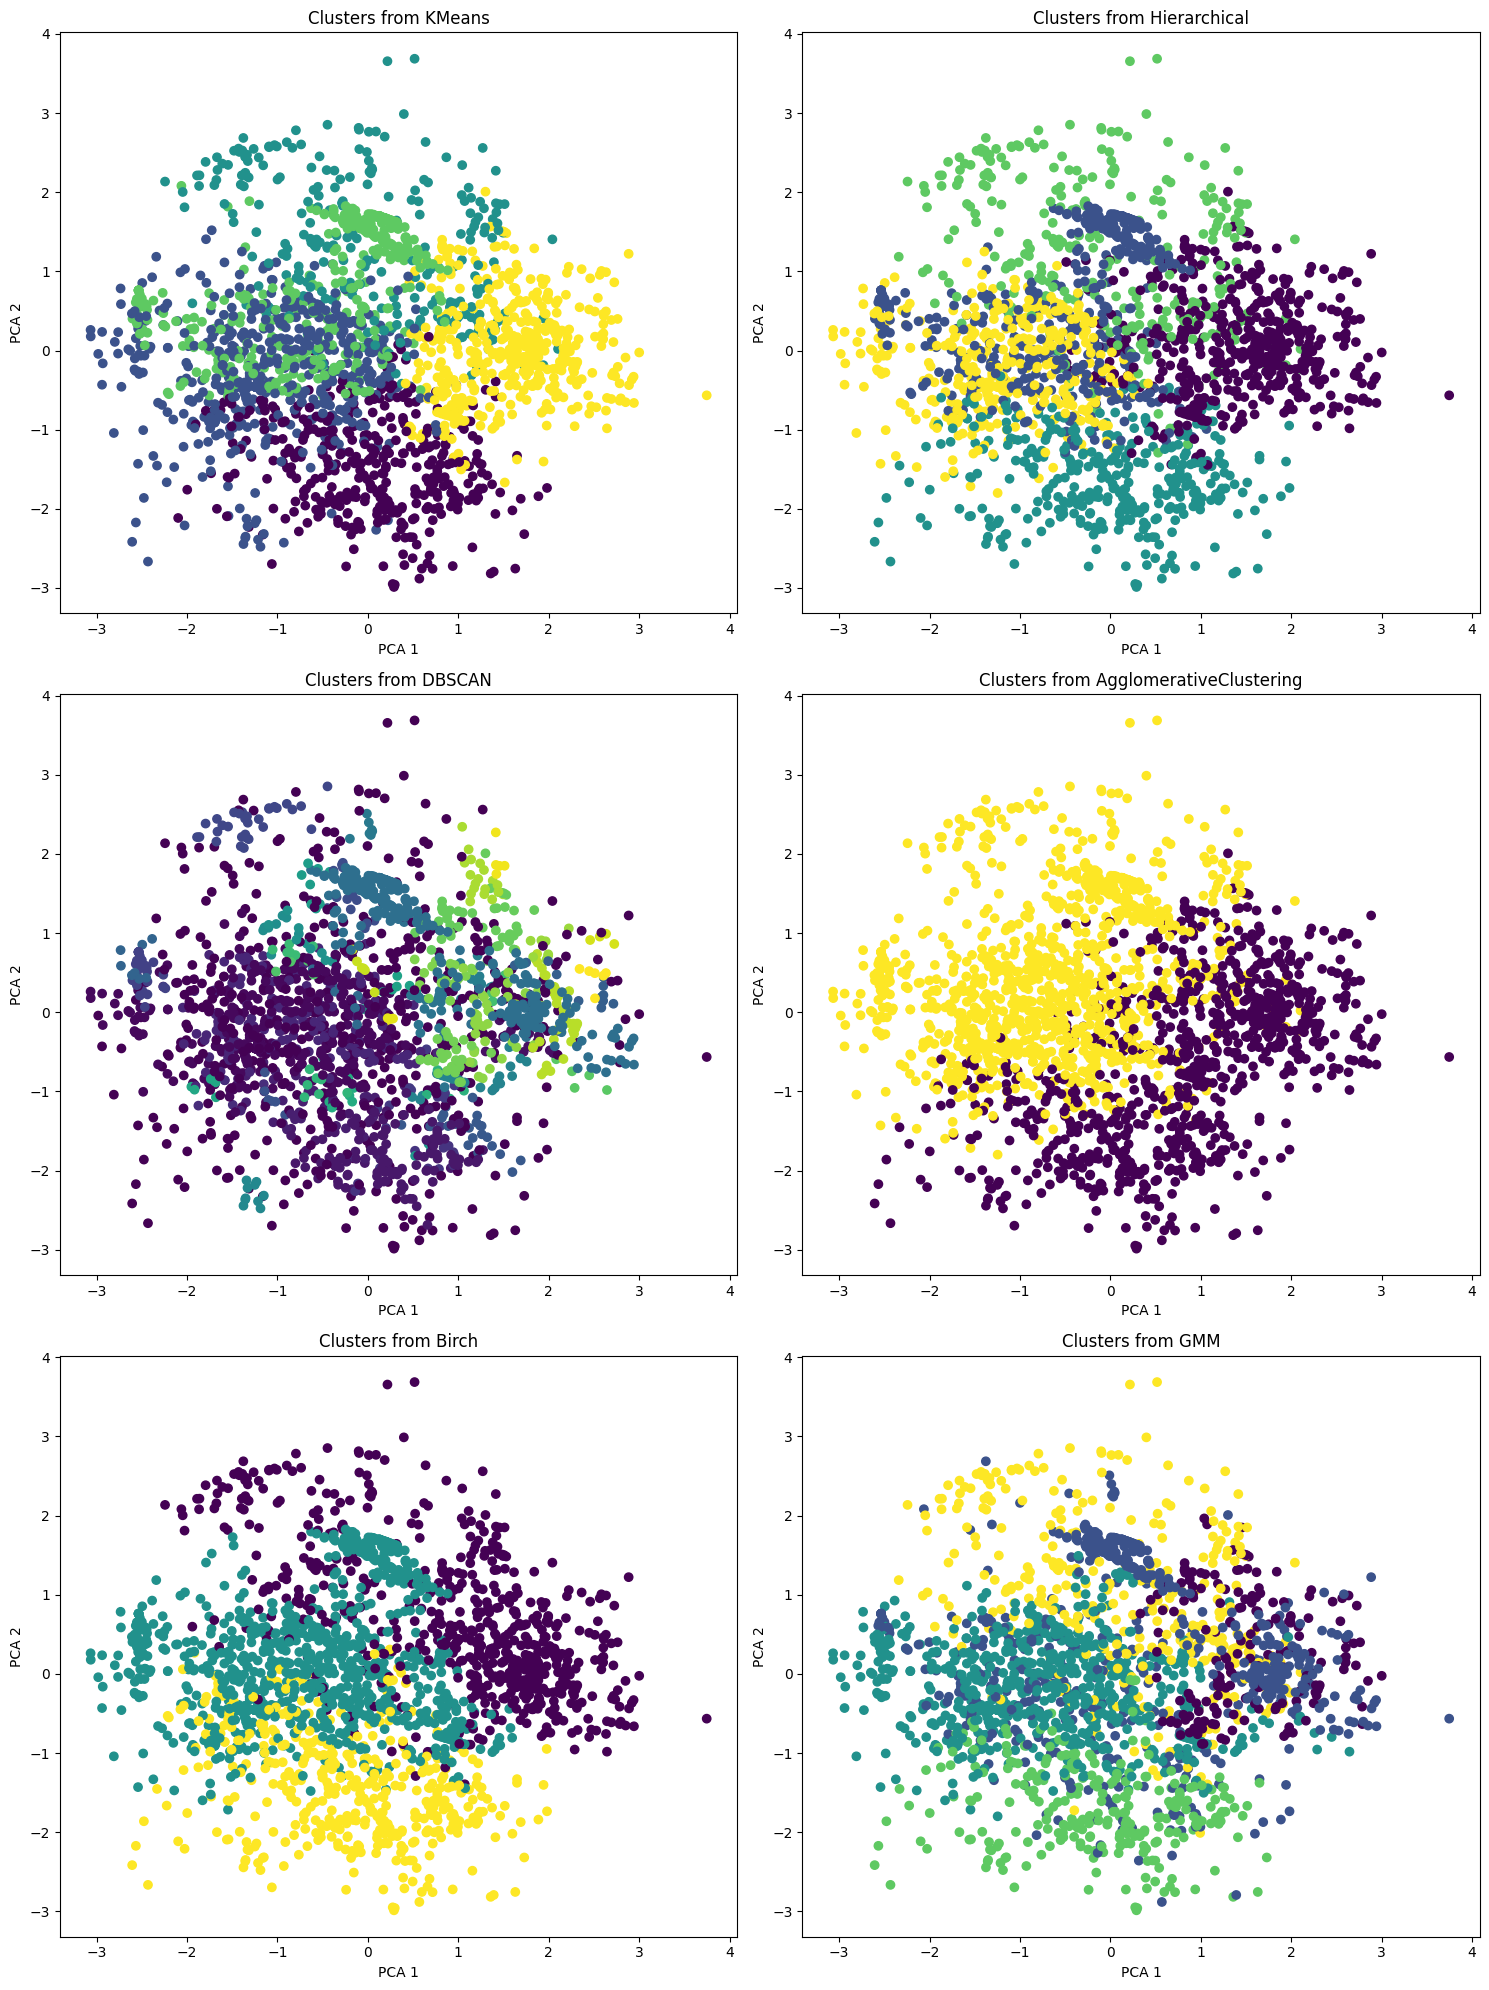

In [ ]:
# Performing PCA for visualization (reducing to 2 components)
pca = PCA(n_components=2)
reduced_data_selected = pca.fit_transform(scaled_data_selected)

# Visualizing Clusters for each model
fig, axes = plt.subplots(3, 2, figsize=(15, 20))
axes = axes.flatten()

for i, (name, model_labels) in enumerate(labels.items()):
    axes[i].scatter(reduced_data_selected[:, 0], reduced_data_selected[:, 1], c=model_labels, cmap='viridis', marker='o')
    axes[i].set_title(f'Clusters from {name}')
    axes[i].set_xlabel('PCA 1')
    axes[i].set_ylabel('PCA 2')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

* **Performing PCA for visualization:**
 * Principal Component Analysis (PCA) is applied to reduce the dimensionality of the data to 2 components.
 * PCA is initialized with n_components=2.
 * fit_transform is applied to the previously scaled data (scaled_data_selected), transforming it into 2 principal components.
 * The resulting reduced data is stored in reduced_data_selected.

* **Visualizing Clusters for each model:**
 * A flattening operation is performed on the axes array for ease of iteration.
 * A loop iterates through each model and its corresponding cluster labels in the labels dictionary.
 * For each model:
   * A scatter plot is created using scatter with the first and second principal components as coordinates.
   *  The color of the points represents the assigned cluster labels (c=model_labels), and the 'viridis' colormap is used.


* **Adjust layout and display the plots:**
 * plt.tight_layout() is called to adjust the layout of subplots for better spacing.
 * plt.show() is used to display the visualizations.

# **Data Frame Two (Diabetes)**

# **1. Importing Dataset**

In [ ]:
# Load the dataset 2
data2 = pd.read_csv('/content/diabetes_012_health_indicators_BRFSS2015.csv')
data2.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


# **2. Preprocessing Data**

In [ ]:
# Selecting specific columns for clustering
selected_columns2 = ['Age', 'BMI', 'Education', 'Income']
data_selected2 = data2[selected_columns2].copy()

# Handle missing values within the selected columns
data_selected2.dropna(inplace=True)

# Scaling the selected data
scaler2 = StandardScaler()
scaled_data_chosen = scaler2.fit_transform(data_selected2)
subset_data = scaled_data_chosen[:2111]

In [ ]:
# Display the selected data
print("Selected Data:")
print(data_selected2.head())

Selected Data:
   Age  BMI  Education  Income
0    9   40          4       3
1    7   25          6       1
2    9   28          4       8
3   11   27          3       6
4   11   24          5       4


* **Selecting specific columns for clustering:**

 * Columns chosen: 'Age', 'BMI' (Body Mass Index), 'Education', 'Income'.
 * A new DataFrame (data_selected2) is created containing only these columns from the original dataset (data2).
 * The copy() method is used to ensure that changes to data_selected2 do not affect the original data2 DataFrame.

* **Handling missing values within the selected columns:**
 * Rows with missing values (NaN) within the selected columns are removed from the data_selected2 DataFrame using dropna(inplace=True).

* **Scaling the selected data:**
 * A StandardScaler (scaler2) is initialized from scikit-learn to standardize the features.
 * The fit_transform method is applied to scale and transform the selected data (data_selected2).

* **Creating a subset of scaled data:**
 * The variable scaled_data_chosen contains the scaled and transformed data from the selected columns.
 * The variable subset_data is created by taking the first 2111 rows of scaled_data_chosen.

# **3. Clustering Models**

In [ ]:
# Clustering Models
models2 = {
    'KMeans': KMeans(n_clusters=5, random_state=0),
    'Hierarchical': AgglomerativeClustering(n_clusters=5),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'AgglomerativeClustering': AgglomerativeClustering(),
    'Birch': Birch(),
    'GMM': GaussianMixture(n_components=5, random_state=0)
}

# Applying models and storing labels
labels2 = {}
for name, model in models2.items():
    if name == 'GMM':
        labels2[name] = model.fit(subset_data).predict(subset_data)
    else:
        labels2[name] = model.fit_predict(subset_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


* **Clustering Models:**

 * Various clustering models are defined in the models2 dictionary:
 * KMeans: K-Means clustering with 5 clusters.
 * Hierarchical: Agglomerative clustering with 5 clusters.
 * DBSCAN: Density-Based Spatial Clustering of Applications with Noise.
 * AgglomerativeClustering: Agglomerative clustering with default parameters.
 * Birch: Birch clustering with default parameters.
 * GMM (Gaussian Mixture Model): Gaussian Mixture Model with 5 components.

* Applying models and storing labels:
 * A dictionary (labels2) is created to store the cluster labels for each model.
 * A loop iterates through each model in the models2 dictionary.
   *  If the model is 'GMM' (Gaussian Mixture Model), it uses fit and predict on the subset of data (subset_data).
   * For other models, it uses fit_predict on the subset of data.
 * The resulting cluster labels are stored in the labels2 dictionary for each model.

# **4. Visualize Data**

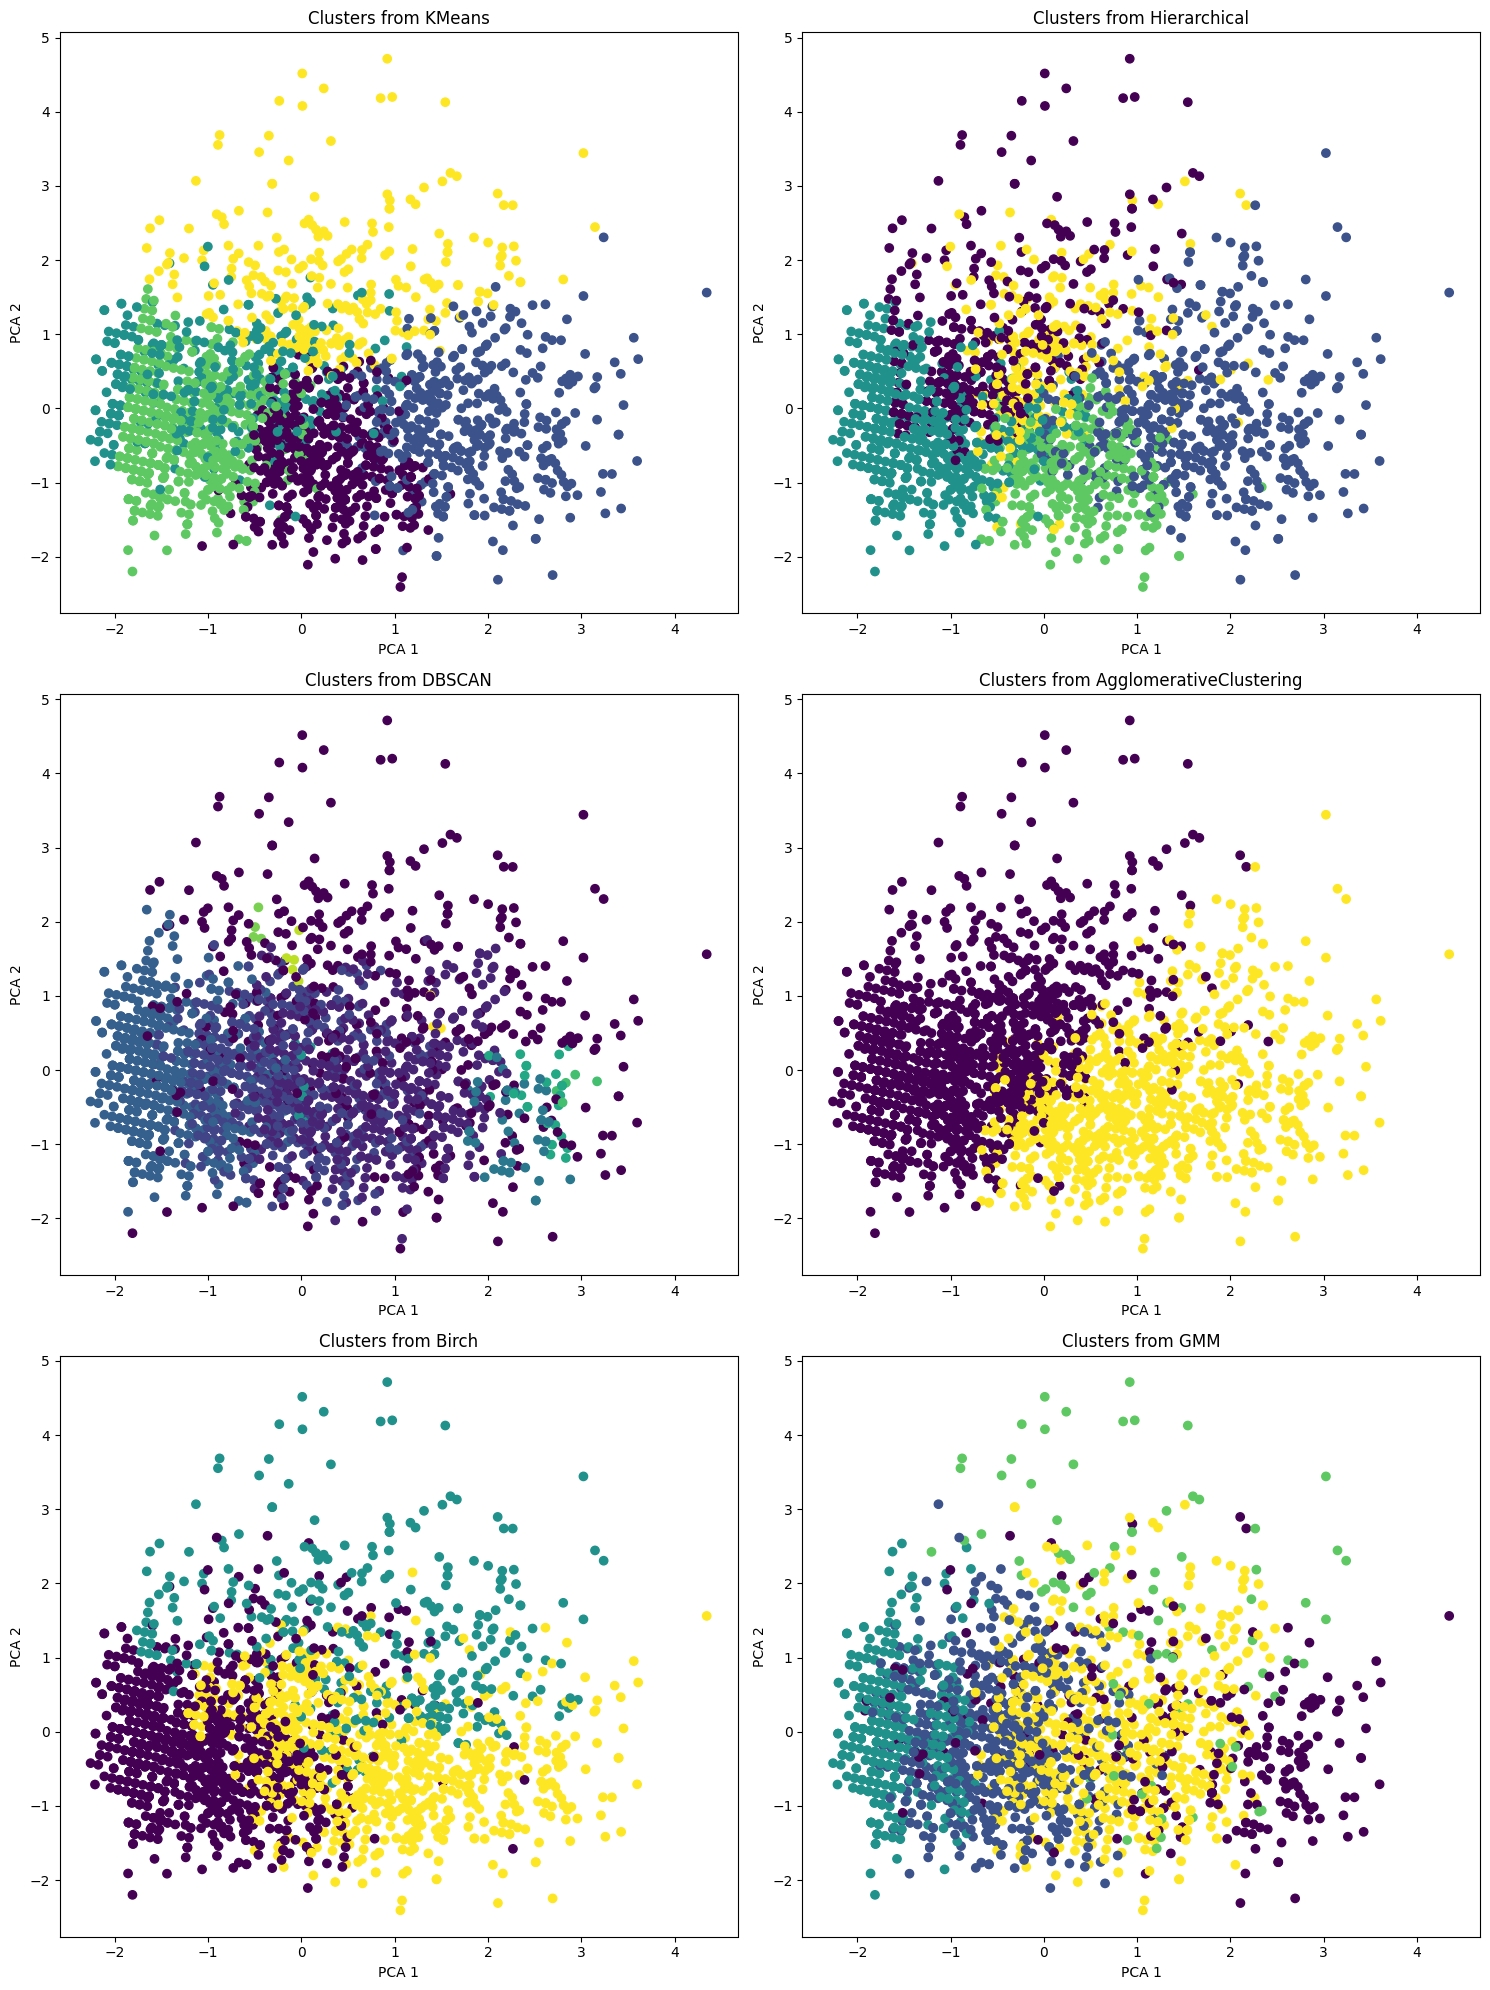

In [ ]:
# Performing PCA for visualization (reducing to 2 components)
pca = PCA(n_components=2)
reduced_data_selected = pca.fit_transform(subset_data)

# Visualizing Clusters for each model
fig, axes = plt.subplots(3, 2, figsize=(15, 20))
axes = axes.flatten()

for i, (name, model_labels) in enumerate(labels2.items()):
    axes[i].scatter(reduced_data_selected[:, 0], reduced_data_selected[:, 1], c=model_labels, cmap='viridis', marker='o')
    axes[i].set_title(f'Clusters from {name}')
    axes[i].set_xlabel('PCA 1')
    axes[i].set_ylabel('PCA 2')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

* **Performing PCA for visualization:**

 * Principal Component Analysis (PCA) is applied to reduce the dimensionality of the data to 2 components.
 * PCA is initialized with n_components=2.
 * fit_transform is applied to the subset of scaled data (subset_data), transforming it into 2 principal components.
 * The resulting reduced data is stored in reduced_data_selected.

* **Visualizing Clusters for each model:**
 * A figure with subplots is created using plt.subplots(3, 2, figsize=(15, 20)), resulting in a 3x2 grid of subplots.
 * A flattening operation is performed on the axes array for ease of iteration.
 * A loop iterates through each model and its corresponding cluster labels in the labels2 dictionary.
 * For each model:
   * A scatter plot is created using scatter with the first and second principal components as coordinates.
   * The color of the points represents the assigned cluster labels (c=model_labels), and the 'viridis' colormap is used.
   * Title, x-axis label ('PCA 1'), and y-axis label ('PCA 2') are set for each subplot.

* **Adjust layout and display the plots:**
 * plt.tight_layout() is called to adjust the layout of subplots for better spacing.
 * plt.show() is used to display the visualizations.